In [21]:
import numpy as np
import matplotlib.pyplot as plt
import brainpy.math as bm
import jax
from Network_Multiple_Maps import Place_net, Grid_net
import time


In [22]:
import numpy as np

# 读取数据并除以0.7
data_coupled_net = np.load('data/bump_scores_coupled_net.npz')
data_place_only = np.load('data/bump_scores_place_only.npz')

bump_score_orginal = data_coupled_net['bump_score_orginal'] / 0.7
bump_score_others = data_coupled_net['bump_score_others'] / 0.7
bump_score_diff = data_coupled_net['bump_score_diff'] / 0.7
bump_score_orginal_std = data_coupled_net['bump_score_orginal_std'] / 0.7
bump_score_others_std = data_coupled_net['bump_score_others_std'] / 0.7
bump_score_diff_std = data_coupled_net['bump_score_diff_std'] / 0.7

bump_score_orginal_only = data_place_only['bump_score_orginal_only'] / 0.7
bump_score_others_only = data_place_only['bump_score_others_only'] / 0.7
bump_score_diff_only = data_place_only['bump_score_diff_only'] / 0.7
bump_score_orginal_std_only = data_place_only['bump_score_orginal_std_only'] / 0.7
bump_score_others_std_only = data_place_only['bump_score_others_std_only'] / 0.7
bump_score_diff_std_only = data_place_only['bump_score_diff_std_only'] / 0.7


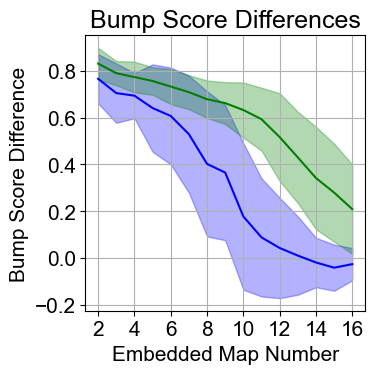

In [40]:
# import matplotlib.pyplot as plt
# import numpy as np

num_map = 15
map_num_all = bm.arange(num_map) + 2 # 2-17
def shaded_errorbar(ax, x, y, yerr, label=None, color=None, alpha_fill=0.3):
    ax.plot(x, y, label=label, color=color)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=alpha_fill)

plt.rcParams.update({'font.size': 15, 'font.family': 'Arial'})

# Create subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 4))

plt.figure(figsize=(4, 4))

# Plot data from the first file
# plt.plot(map_num_all, bump_score_diff_only, label='940 Place cells')
# plt.plot(map_num_all, bump_score_diff, label='800 Place cells with 20*7 grid cells')


shaded_errorbar(plt.gca(), map_num_all, bump_score_diff_only, bump_score_diff_std_only, label='940 Place cells', color='b')
shaded_errorbar(plt.gca(), map_num_all, bump_score_diff, bump_score_diff_std, label='800 Place cells with 20*7 grid cells', color='g')

plt.xlabel('Embedded Map Number')
plt.ylabel('Bump Score Difference')
plt.title('Bump Score Differences')
plt.xticks(map_num_all[::2])
# plt.legend()
plt.grid(True)

# Save the plot
plt.tight_layout()
plt.savefig('figures/Bump_score_difference.pdf')



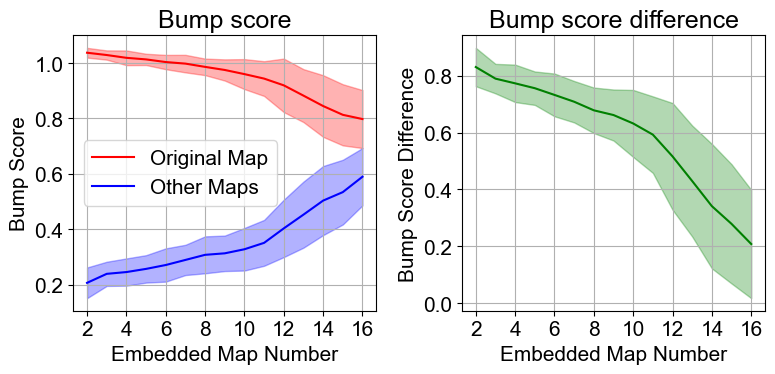

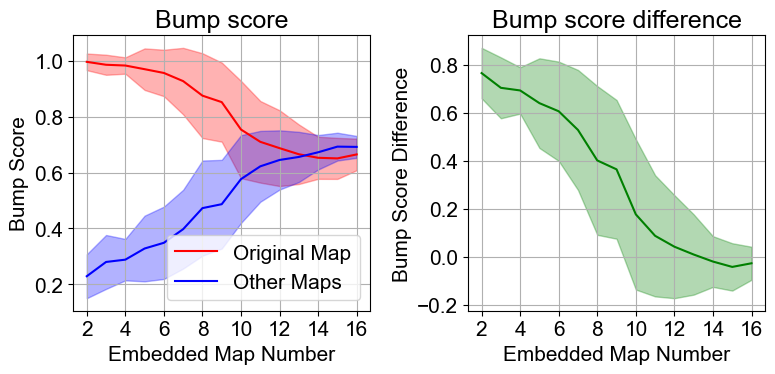

In [27]:
plt.rcParams.update({'font.size': 15, 'font.family': 'Arial'})

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# First subplot: bump_score_orginal and bump_score_others
shaded_errorbar(ax1, map_num_all, bump_score_orginal, bump_score_orginal_std, label='Original Map', color='r')
shaded_errorbar(ax1, map_num_all, bump_score_others, bump_score_others_std, label='Other Maps', color='b')

ax1.set_xlabel('Embedded Map Number')
ax1.set_ylabel('Bump Score')
ax1.legend()
ax1.set_title('Bump score')
ax1.grid(True)
ax1.set_xticks(map_num_all[::2])
# Second subplot: bump_score_diff
shaded_errorbar(ax2, map_num_all, bump_score_diff, bump_score_diff_std, label='Difference', color='g')

ax2.set_xlabel('Embedded Map Number')
ax2.set_ylabel('Bump Score Difference')
# ax2.legend()
ax2.grid(True)
ax2.set_xticks(map_num_all[::2])
ax2.set_title('Bump score difference')

# Save the plot
plt.tight_layout()
plt.savefig('figures/bump_score_errorbars_coupled_net_noshufflephase.pdf')

# First subplot: bump_score_orginal_only and bump_score_others_only
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
shaded_errorbar(ax1, map_num_all, bump_score_orginal_only, bump_score_orginal_std_only, label='Original Map', color='r')
shaded_errorbar(ax1, map_num_all, bump_score_others_only, bump_score_others_std_only, label='Other Maps', color='b')

ax1.set_xlabel('Embedded Map Number')
ax1.set_ylabel('Bump Score')
ax1.set_title('Bump score')
ax1.legend()
ax1.grid(True)
ax1.set_xticks(map_num_all[::2])

# Second subplot: bump_score_diff_only
shaded_errorbar(ax2, map_num_all, bump_score_diff_only, bump_score_diff_std_only, label='Difference', color='g')

ax2.set_xlabel('Embedded Map Number')
ax2.set_ylabel('Bump Score Difference')
# ax2.legend()
ax2.grid(True)
ax2.set_xticks(map_num_all[::2])
ax2.set_title('Bump score difference')

# Save the plot
plt.tight_layout()
plt.savefig('figures/bump_score_errorbars_place_only.pdf')